In [20]:
import numpy as np
import matplotlib.pyplot as plt

# PCA on artificial 2D Gaussian dataset

In [258]:
d = 2
eig_colors = ["g", "k"]
eig_scale = 3
true_mean = np.ones((2,1))
a = 2
b = 1.8

true_covariance_matrix = [[a, b],
                     [b, a]]


In [264]:
true_covariance_matrix

[[2, 1.8], [1.8, 2]]

In [287]:
# Sample artificial data points
N_samples = 500
X = np.random.multivariate_normal(mean=true_mean.flatten(),cov=true_covariance_matrix, size=(N_samples,))

# Compute data covariance matrix from data points
mean = X.mean(axis=0)
covariance_matrix = (1/N_samples)*(X-mean).T.dot(X-mean)
mean = mean.reshape(2,1)
print(mean, true_mean)
print(covariance_matrix, true_covariance_matrix)

[[0.98400469]
 [1.01373412]] [[1.]
 [1.]]
[[2.05100479 1.88065565]
 [1.88065565 2.08871286]] [[2, 1.8], [1.8, 2]]


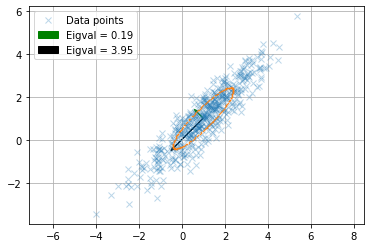

In [289]:
# Plot data points
plt.plot(X[:,0], X[:,1],'x', alpha=0.3, label="Data points")

# Plot eigenvectors
eigval, eigvec = np.linalg.eig(covariance_matrix)
for i in range(d):
    eig_scale = 1/np.sqrt(1/eigval[i])
    plt.arrow(mean[0,0],mean[1,0], eig_scale * eigvec[0,i], eig_scale * eigvec[1,i], color=eig_colors[i], label=f"Eigval = {round(eigval[i],2)}", head_width=0.1)
      
# Plot
for x in np.linspace(-6,6,300):
    for y in np.linspace(-3,3,300):
        x_vec = np.array([x,y]).reshape(2,1)
        #mean = mean.reshape(2,1)
        #print(x_vec,mean)
        if 0.95<= np.dot((x_vec.T-mean.T), np.dot(np.linalg.inv(covariance_matrix),x_vec-mean)) <= 1:
            plt.plot(x,y,'.',color='C1', markersize=1)

plt.xlim(left=-4,right=4)
plt.ylim((-4,4))
plt.grid()
plt.legend()
plt.axis("equal")
plt.gca().set_aspect('equal')

Let $S$ be the covariance matrix.
The goal of PCA is to find the directions which maximize the variance 
The eigenvector associated to the largest eigenvalue is the largest eigenvector 

In [233]:
eigvec

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [234]:
0.7**2+0.7**2

0.9799999999999999

In [122]:
covariance_matrix

[[10, 0], [0, 1]]

# MNIST dataset